Population Spread in London City Boroughs

**Imports**

In [1]:
import csv as csv 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gp
import statsmodels.api as sm

**Loading of datasets**

In [2]:
#Loading of my datasets into the console
employmentrate = pd.read_excel('../input/employment-rate/employmentrate2017.xlsx')

employmentrate.head()

#References
#London DataStore
#(Employment Rates by Ethnicity)
#(https://data.london.gov.uk/dataset/employment-rates-by-ethnicity)

,Area,White,Mixed,Indian,Pakistan/Bangladesh,Black/Black British,Other
0,Barking and Dagenham,69.6,74.5,68.4,59.7,73.8,61.0
1,Barnet,77.4,57.1,72.9,36.5,91.3,70.2
2,Bexley,75.2,75.7,76.8,56.3,78.9,76.6
3,Brent,77.1,71.1,71.9,55.7,57.5,63.2
4,Bromley,78.9,71.8,64.3,74.5,85.7,68.8


In [3]:
#Loading of my second dataset
employmentindustry = pd.read_excel('../input/employment-industry/employmentindustry2017.xlsx')

employmentindustry.head()

#References
#London DataStore
#(Workplace Employment by Industry
#(https://data.london.gov.uk/dataset/workplace-employment-industry-borough))

,Area,"Agriculture, Forestry & Fishing","Mining, Quarrying & Utilities",Manufacturing,Construction,Motor Trades,Wholesale,Retail,Transport & Storage,Accommodation & Food Services,Information & Communication,Financial & Insurance,Property,"Professional, Scientific & Technical",Business Administration & Support Services,Public Administration & Defence,Education,Health,"Arts, Entertainment, Recreation & Other Services"
0,Barking and Dagenham,0,700,4500,4000,1250,4500,5000,5000,2500,1500,500,500,2000,6000,2250,7000,6000,2000
1,Barnet,100,300,3000,9000,2000,4000,15000,4000,9000,6000,2250,6000,13000,12000,3500,17000,22000,7000
2,Bexley,10,1250,4500,7000,2250,3000,9000,5000,4500,2500,1000,1750,4000,9000,3000,8000,8000,2500
3,Brent,10,1000,8000,8000,3000,9000,13000,9000,9000,5000,1500,3000,8000,12000,3000,11000,20000,5000
4,Bromley,450,900,2250,9000,1750,2500,13000,3500,7000,4500,6000,2250,8000,11000,3000,12000,18000,7000


In [4]:
#Loading of my third dataset
londoncensus = pd.read_csv('../input/london-census/londoncensus.csv')

londoncensus.head()

#References
#London Census Data
#https://moodle.city.ac.uk/mod/page/view.php?id=1400847

,ID,Name,Borough,No of all residents,Area Hectares,Density (no of persons per hectare),Population by age: all ages,Population by age: 0 to 4,Population by age: 5 to 7,Population by age: 8 to 9,...,financial year=2003/__: 10 Other Notifiable Offences (Offences numbers),financial year=2004/__: 10 Other Notifiable Offences (Offences numbers),financial year=2005/__: 10 Other Notifiable Offences (Offences numbers),financial year=2006/__: 10 Other Notifiable Offences (Offences numbers),financial year=2007/__: 10 Other Notifiable Offences (Offences numbers),financial year=2008/__: 10 Other Notifiable Offences (Offences numbers),financial year=2009/__: 10 Other Notifiable Offences (Offences numbers),financial year=2010/__: 10 Other Notifiable Offences (Offences numbers),financial year=2011/__: 10 Other Notifiable Offences (Offences numbers),financial year=2012/__: 10 Other Notifiable Offences (Offences numbers)
0,E05000001,Aldersgate,NaN,1465.0,12.98,112.9,1465.0,50.0,19.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E05000002,Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E05000003,Bassishaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E05000004,Billingsgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E05000005,Bishopsgate,NaN,222.0,81.53,2.7,222.0,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dataset Information**

In [5]:
#Datasets Information, mean, max, std for example
print('The Employment Rate dataframe has {} rows and {} columns'.format(employmentrate.shape[0], employmentrate.shape[1]))
print('The Employment Industry dataframe has {} rows and {} columns'.format(employmentindustry.shape[0], employmentindustry.shape[1]))
print('The London Census dataframe has {} rows and {} columns'.format(londoncensus.shape[0], londoncensus.shape[1]))


The Employment Rate dataframe has 32 rows and 7 columns
The Employment Industry dataframe has 33 rows and 19 columns
The London Census dataframe has 649 rows and 610 columns


**Description of Datasets**

In [6]:
employmentrate.describe(include='all')

,Area,White,Mixed,Indian,Pakistan/Bangladesh,Black/Black British,Other
count,32,32.000000,32.000000,32.0,32,32.000000,32.000000
unique,32,NaN,NaN,31.0,30,NaN,NaN
top,Richmond upon Thames,NaN,NaN,72.8,!,NaN,NaN
freq,1,NaN,NaN,2.0,2,NaN,NaN
mean,NaN,78.762500,66.518750,NaN,NaN,69.409375,66.353125
std,NaN,5.205751,14.187055,NaN,NaN,9.969449,7.382236
min,NaN,67.800000,34.000000,NaN,NaN,50.200000,48.800000
25%,NaN,75.800000,56.825000,NaN,NaN,61.325000,62.050000
50%,NaN,78.550000,68.050000,NaN,NaN,69.250000,66.900000
75%,NaN,83.075000,77.500000,NaN,NaN,77.075000,71.425000


In [7]:
employmentindustry.describe(include='all')

,Area,"Agriculture, Forestry & Fishing","Mining, Quarrying & Utilities",Manufacturing,Construction,Motor Trades,Wholesale,Retail,Transport & Storage,Accommodation & Food Services,Information & Communication,Financial & Insurance,Property,"Professional, Scientific & Technical",Business Administration & Support Services,Public Administration & Defence,Education,Health,"Arts, Entertainment, Recreation & Other Services"
count,33,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
unique,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Richmond upon Thames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,61.212121,856.818182,3353.030303,6272.727273,1226.515152,4833.333333,12939.393939,7280.303030,11924.242424,12727.272727,11375.757576,3783.333333,21681.818182,17651.515152,6507.575758,12060.606061,16909.090909,8106.060606
std,NaN,89.539013,593.561573,2462.117337,2592.329156,762.293502,3219.609513,9086.182483,8084.455951,14022.371195,15407.405337,32614.852639,5588.697672,31833.261443,15461.891080,10925.437071,6343.990237,8825.968914,8557.487197
min,NaN,0.000000,100.000000,900.000000,2500.000000,125.000000,1500.000000,5000.000000,1500.000000,2500.000000,1500.000000,500.000000,500.000000,2000.000000,4500.000000,1500.000000,5000.000000,6000.000000,2000.000000
25%,NaN,10.000000,500.000000,1750.000000,4500.000000,700.000000,2500.000000,9000.000000,3500.000000,5000.000000,3000.000000,1250.000000,1750.000000,5000.000000,9000.000000,3000.000000,9000.000000,11000.000000,4000.000000
50%,NaN,25.000000,700.000000,2500.000000,6000.000000,900.000000,3500.000000,11000.000000,5000.000000,9000.000000,6000.000000,1500.000000,2250.000000,10000.000000,12000.000000,3500.000000,11000.000000,15000.000000,6000.000000
75%,NaN,100.000000,1000.000000,3500.000000,8000.000000,2000.000000,6000.000000,14000.000000,7000.000000,14000.000000,16000.000000,3500.000000,4000.000000,16000.000000,19000.000000,5000.000000,13000.000000,19000.000000,8000.000000


In [8]:
londoncensus.describe(include='all')

,ID,Name,Borough,No of all residents,Area Hectares,Density (no of persons per hectare),Population by age: all ages,Population by age: 0 to 4,Population by age: 5 to 7,Population by age: 8 to 9,...,financial year=2003/__: 10 Other Notifiable Offences (Offences numbers),financial year=2004/__: 10 Other Notifiable Offences (Offences numbers),financial year=2005/__: 10 Other Notifiable Offences (Offences numbers),financial year=2006/__: 10 Other Notifiable Offences (Offences numbers),financial year=2007/__: 10 Other Notifiable Offences (Offences numbers),financial year=2008/__: 10 Other Notifiable Offences (Offences numbers),financial year=2009/__: 10 Other Notifiable Offences (Offences numbers),financial year=2010/__: 10 Other Notifiable Offences (Offences numbers),financial year=2011/__: 10 Other Notifiable Offences (Offences numbers),financial year=2012/__: 10 Other Notifiable Offences (Offences numbers)
count,649,649,624,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
unique,649,627,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E05000609,Village,Croydon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12933.450949,248.758038,80.540665,12933.450949,935.909810,476.416139,287.522152,...,15.415064,15.387821,13.435897,13.929487,15.491987,17.149038,18.072115,18.128205,16.626603,15.068910
std,NaN,NaN,NaN,2773.784570,255.198054,47.749048,2773.784570,315.394558,159.011584,97.322032,...,17.833612,21.171627,17.596578,16.183583,16.977464,17.575115,20.465755,19.883519,18.740348,15.826813
min,NaN,NaN,NaN,222.000000,12.980000,1.800000,222.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,11133.250000,117.487500,45.175000,11133.250000,719.250000,370.000000,227.000000,...,7.000000,7.000000,6.000000,6.000000,6.000000,8.000000,8.000000,8.000000,7.000000,7.000000
50%,NaN,NaN,NaN,12945.500000,184.000000,68.400000,12945.500000,903.500000,463.000000,280.500000,...,12.000000,11.000000,10.000000,11.000000,12.000000,13.000000,14.000000,14.000000,13.000000,12.000000
75%,NaN,NaN,NaN,14855.250000,279.087500,108.900000,14855.250000,1138.250000,567.250000,347.000000,...,19.000000,18.000000,16.000000,17.000000,19.000000,21.000000,22.000000,21.000000,20.000000,19.000000


**Cleaning the datasets**

I used OpenRefine to clean all the datasets, mostly the employmentrate and employment industry. For the londoncensus data, the only data wrangling I did was to change all the column names related to boroughs in London.
In the employmentrate dataset there are three missing values in two columns with an exclamation point '!'. One in the 'Indian' column and two in the 'Paskistan/Bangladesh' column. Also in Lambeth, the percentage is 100% for Pakistan/Bangladesh when in actuality, there was't any data for number of employed divided by total population.
Below, I used different techniques to locate the three missing data in the employmentrate dataset and then replaced them with the means of the two columns with missing data.

**Filling out the missing datasets**

In [9]:
#I tried using dataframes shape and count to give me the number of missing values
#But it didn't show me the 3 missing values with exclamation point (!) in the employmentrate dataset
print (employmentrate.shape[0] - employmentrate.count())

Area                   0
White                  0
Mixed                  0
Indian                 0
Pakistan/Bangladesh    0
Black/Black British    0
Other                  0
dtype: int64


In [10]:
#Then I tried using isnull() to find out if the 3 missing values would be discovered and it wasn't...
atLeastOneNaN = employmentrate['Indian'].isnull() | employmentrate['Pakistan/Bangladesh'].isnull()
print(atLeastOneNaN)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool


In [11]:
#Here are the three missing values in the employmentrate dataset
print(employmentrate.Indian[12])
print(employmentrate['Pakistan/Bangladesh'][21])
print(employmentrate['Pakistan/Bangladesh'][25])

!
!
!


In [12]:
#As you can see when I try to get the mean of the dataset, the two obvious columns with '!' in them are missing
employmentrate.mean()

White                  78.762500
Mixed                  66.518750
Black/Black British    69.409375
Other                  66.353125
dtype: float64

In [13]:
#Right here, I am replacing the '!' with NaN values and then replacing those NaN values with the means of the....
#...'Indian' & 'Pakistan/Bangladesh' columns respectively.
employmentrate['Indian'] = employmentrate['Indian'].replace('!',np.NaN)
employmentrate['Indian'] = employmentrate['Indian'].fillna(employmentrate['Indian'].mean())

employmentrate['Pakistan/Bangladesh'] = employmentrate['Pakistan/Bangladesh'].replace('!',np.NaN)
employmentrate['Pakistan/Bangladesh'] = employmentrate['Pakistan/Bangladesh'].fillna(employmentrate['Pakistan/Bangladesh'].mean())

In [14]:
#Now when I compute the mean, it gives me the mean for all the columns in the employmentrate dataset
employmentrate.mean()

White                  78.762500
Mixed                  66.518750
Indian                 74.358065
Pakistan/Bangladesh    62.820000
Black/Black British    69.409375
Other                  66.353125
dtype: float64

**Population Spread in London**

Now I will visually display the population spread in London across various boroughs. I am confident that questions like, 'What is the most populated area in London', 'Why is that area highly populated', 'Is the employment rate high/low in the most populated area in London', 'What employment industries have the highest employment in the most populated area in London' will be answered.

In [15]:
#First of all, I will slice the London Census data to get the columns I need to be analysed visually
#I will slice the dataset to get the rows that have all the boroughs and population by Age, Ethnic group, Sex,
#...Religion, and health condition columns
ldncensusdf = londoncensus.iloc[25:, [0, 1, 2, 3, 6, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 
                                      37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 
                                      51, 54, 55, 56, 57, 58, 59, 60, 64, 65, 66, 67, 68]]
ldncensusdf.head()

,ID,Name,Borough,No of all residents,Population by age: all ages,Population by sex: Male,Population by sex: Female,Population by ethnic group: White,Population by ethnic group: White(English/Welsh/Scottish/Northern Irish/British),Population by ethnic group: White(Irish),...,Population by religion: Hindu,Population by religion: Jewish,Population by religion: Muslim,Population by religion: Sikh,Population by religion: Other religion,Population by health condition: Very good health,Population by health condition: Good health,Population by health condition: Fair health,Population by health condition: Bad health,Population by health condition: Very bad health
25,E05000026,Abbey,BarkingDagenham,12786.0,12786.0,6822.0,5964.0,3596.0,2025.0,75.0,...,1186.0,25.0,4412.0,493.0,46.0,6555.0,4418.0,1260.0,433.0,120.0
26,E05000027,Alibon,BarkingDagenham,10385.0,10385.0,4951.0,5434.0,7275.0,6362.0,101.0,...,64.0,20.0,640.0,29.0,34.0,4835.0,3574.0,1279.0,514.0,183.0
27,E05000028,Becontree,BarkingDagenham,11545.0,11545.0,5616.0,5929.0,6789.0,5846.0,102.0,...,272.0,35.0,1586.0,232.0,28.0,5415.0,3861.0,1465.0,631.0,173.0
28,E05000029,Chadwell Heath,BarkingDagenham,10021.0,10021.0,4756.0,5265.0,6224.0,5521.0,120.0,...,328.0,41.0,1042.0,278.0,27.0,4385.0,3430.0,1524.0,534.0,148.0
29,E05000030,Eastbrook,BarkingDagenham,10506.0,10506.0,5067.0,5439.0,7904.0,7246.0,128.0,...,86.0,30.0,557.0,55.0,27.0,4844.0,3602.0,1439.0,473.0,148.0


In [16]:
#Loading the shp file for the london census data
ldnwards = gp.read_file('../input/london-shape-files/london_wards_2011_wgs84.shp')
ldnwards.head()

,CODE,OLDCODE,NAME,ALTNAME,geometry
0,E05000001,00AAFA,Aldersgate,None,"POLYGON ((-0.09740 51.52159, -0.09730 51.52158..."
1,E05000002,00AAFB,Aldgate,None,"POLYGON ((-0.07786 51.51581, -0.07730 51.51545..."
2,E05000003,00AAFC,Bassishaw,None,"POLYGON ((-0.09110 51.51804, -0.09002 51.51780..."
3,E05000004,00AAFD,Billingsgate,None,"POLYGON ((-0.08034 51.50801, -0.08052 51.50806..."
4,E05000005,00AAFE,Bishopsgate,None,"POLYGON ((-0.07847 51.52151, -0.07873 51.52104..."


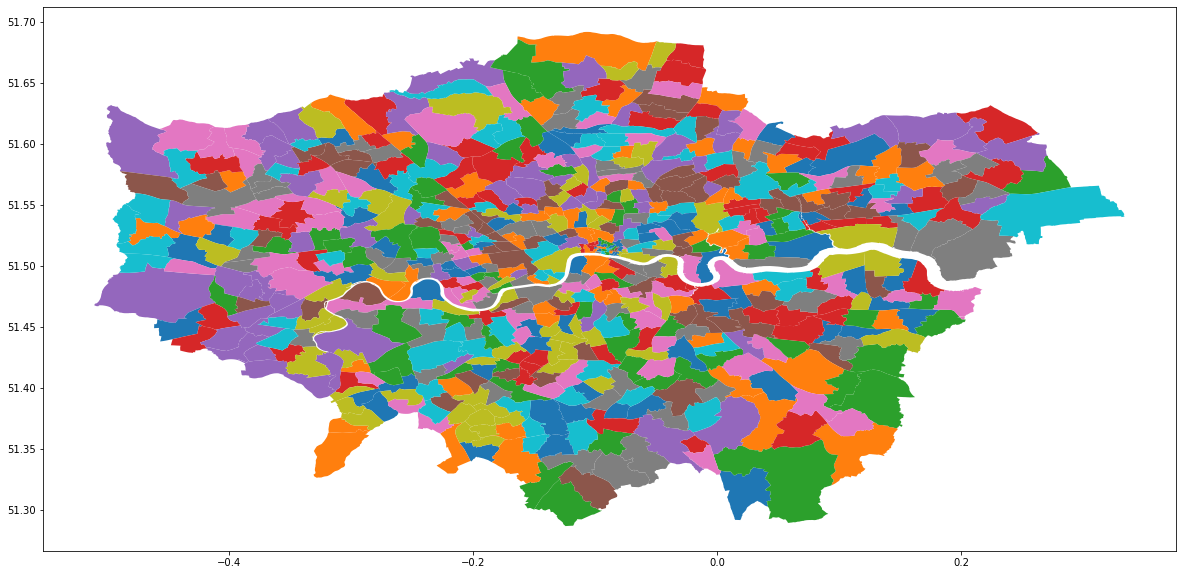

In [17]:
#Ploting georgraphical boundaries of london wards
ldnwards.plot(column='NAME', figsize=(40,10))
plt.show()

In [18]:
#Joining sliced london census data with geography
frames=[ldnwards,ldncensusdf]
data=pd.concat(frames,axis=1)
#Removing any wards that have missing values
ldngeo = data[data['Borough'].notnull()];
ldngeo.describe()

,No of all residents,Population by age: all ages,Population by sex: Male,Population by sex: Female,Population by ethnic group: White,Population by ethnic group: White(English/Welsh/Scottish/Northern Irish/British),Population by ethnic group: White(Irish),Population by ethnic group: White(Gypsy or Irish Traveller),Population by ethnic group: White(Other White),Population by ethnic group: Mixed/multiple ethnic groups,...,Population by religion: Hindu,Population by religion: Jewish,Population by religion: Muslim,Population by religion: Sikh,Population by religion: Other religion,Population by health condition: Very good health,Population by health condition: Good health,Population by health condition: Fair health,Population by health condition: Bad health,Population by health condition: Very bad health
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,13087.445513,13087.445513,6457.048077,6630.397436,7823.134615,5873.463141,281.721154,13.129808,1654.820513,649.022436,...,658.887821,237.878205,1622.458333,202.108974,76.830128,6608.455128,4364.216346,1465.371795,489.027244,160.375000
std,2430.502303,2430.502303,1250.522607,1218.578833,2394.729515,2487.763749,147.069913,16.857370,933.174838,277.367080,...,927.453292,694.270765,1450.956286,537.339225,73.420292,1286.610649,919.986621,359.265252,153.160783,60.653295
min,5110.000000,5110.000000,2517.000000,2593.000000,841.000000,472.000000,28.000000,0.000000,112.000000,121.000000,...,19.000000,1.000000,29.000000,4.000000,13.000000,2600.000000,1673.000000,524.000000,120.000000,37.000000
25%,11200.000000,11200.000000,5473.500000,5721.250000,6385.000000,3993.250000,176.750000,4.000000,871.750000,436.750000,...,140.750000,26.000000,598.750000,27.750000,45.000000,5642.250000,3686.750000,1217.000000,377.750000,115.000000
50%,12989.500000,12989.500000,6433.500000,6606.500000,7874.000000,5799.000000,251.000000,9.000000,1583.000000,619.000000,...,293.000000,57.000000,1198.000000,49.000000,61.000000,6556.500000,4390.500000,1498.000000,500.000000,155.000000
75%,14864.750000,14864.750000,7354.500000,7487.250000,9274.250000,7396.750000,355.000000,16.000000,2286.500000,833.000000,...,686.750000,119.250000,2168.500000,122.000000,80.000000,7448.750000,5048.250000,1723.500000,593.000000,202.000000
max,23084.000000,23084.000000,12251.000000,10833.000000,14593.000000,13791.000000,1027.000000,232.000000,4740.000000,1630.000000,...,6644.000000,6975.000000,7916.000000,5747.000000,914.000000,13341.000000,7312.000000,2505.000000,937.000000,361.000000


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


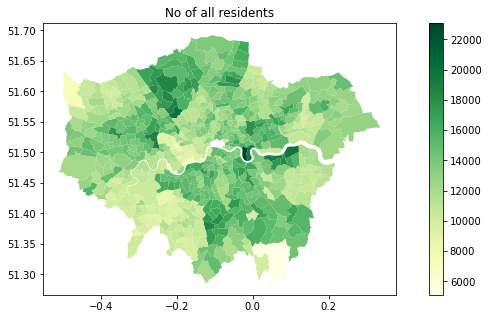

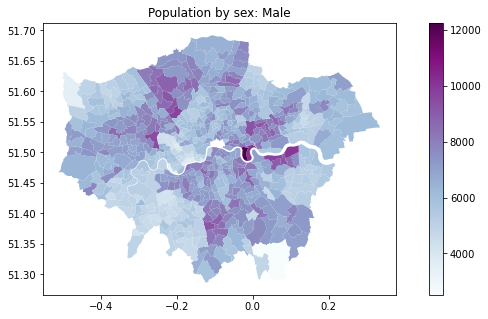

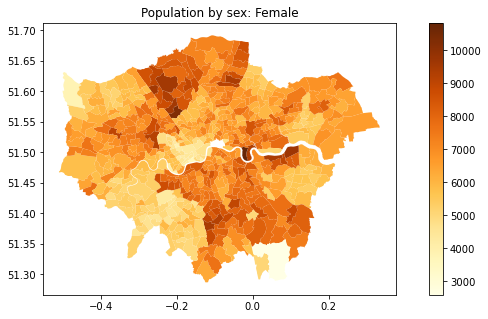

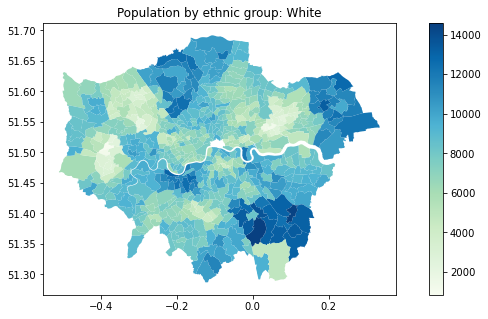

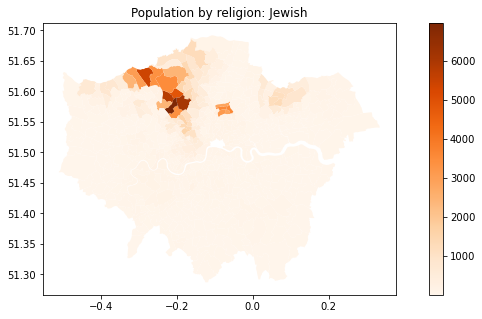

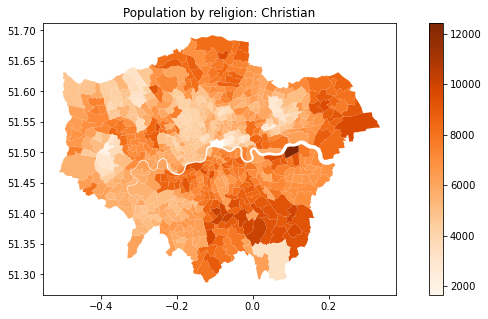

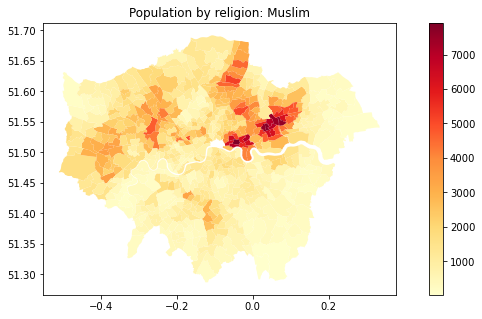

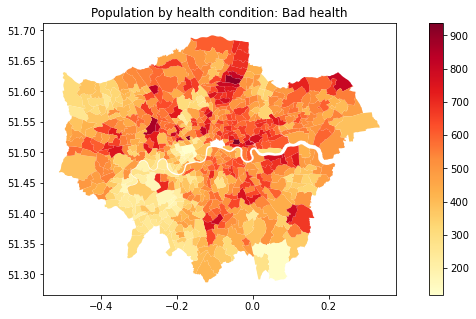

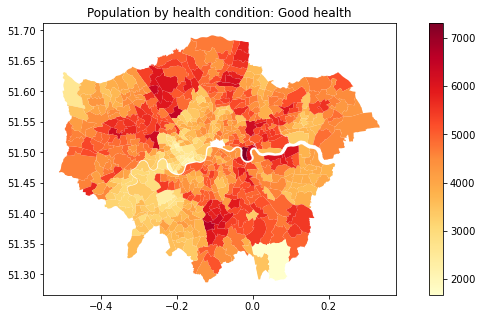

In [19]:
#Geographically plotting the cesus data to discover different spread across london based on Sex, Religion and...
#Health condition for example
ldngeo.crs = {'init' :'epsg:4326'}
attr = "No of all residents"
ax = ldngeo.plot(column=attr, cmap='YlGn', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by sex: Male"
ax = ldngeo.plot(column=attr, cmap='BuPu', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by sex: Female"
ax = ldngeo.plot(column=attr, cmap='YlOrBr', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by ethnic group: White"
ax = ldngeo.plot(column=attr, cmap='GnBu', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by religion: Jewish"
ax = ldngeo.plot(column=attr, cmap='Oranges', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by religion: Christian"
ax = ldngeo.plot(column=attr, cmap='Oranges', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by religion: Muslim"
ax = ldngeo.plot(column=attr, cmap='YlOrRd', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by health condition: Bad health"
ax = ldngeo.plot(column=attr, cmap='YlOrRd', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()
attr = "Population by health condition: Good health"
ax = ldngeo.plot(column=attr, cmap='YlOrRd', legend=True, figsize=(12,5))
ax.set_title(attr)
plt.show()

I geographically plotted the main variables(Ages, Ethnic group, Sex, Religion and Health condition) above. As you can see above, in the plot for the Jewish population in London, they are mainly located in the north of london where as the Christians are evenly spread across london. Residents with 'Bad Health' are almost pretty much evenly spread around London except south east london which is quite alarming to be honest.

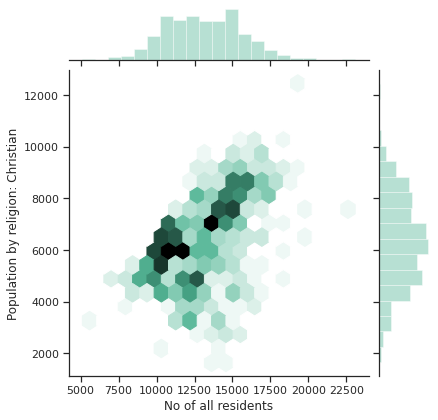

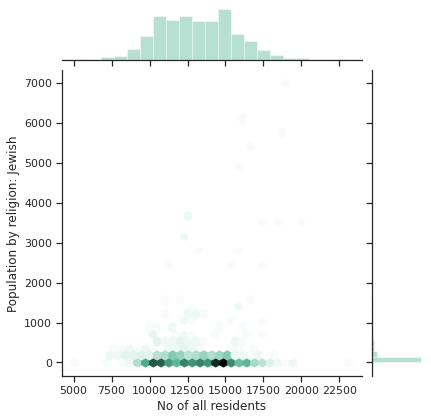

In [20]:
#Using a hexbin plot with marginal distributions to distintly assess the spread of Jewish religion compared to 
#Christians
#Plotting the hexbin plot for Christians
sns.set(style="ticks")


x = ldncensusdf['No of all residents']
y = ldncensusdf['Population by religion: Christian']

sns.jointplot(x, y, kind="hex", color="#4CB391")
#Plotting the hexbin box plot for Jewish
sns.set(style="ticks")


x = ldncensusdf['No of all residents']
y = ldncensusdf['Population by religion: Jewish']

sns.jointplot(x, y, kind="hex", color="#4CB391")

[](http://)The Hexbin plot with marginal distributions reiterated my discovery that the Christian population are evenly distributed than the Jewish across london boroughs.

**Employment Rate**

Plotting the employment rate by ethnicity should be straight forward. I will cross check with my plotted geographical data to find out, for example, what religion is highly populated in that area or if the health condition of that area is good or bad. I used a horizontal bar chart because it lists all 36 boroughs on the vertical axis clearly.

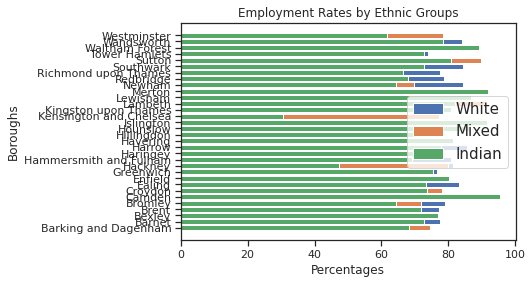

In [21]:
#Using a horizontal bar chat
#Ploting the employment rate of White
plt.barh(employmentrate.Area, employmentrate.White, label='White')

#Ploting the employment rate of Mixed
plt.barh(employmentrate.Area, employmentrate.Mixed, label='Mixed')

#Ploting the employment rate of Indian
plt.barh(employmentrate.Area, employmentrate.Indian, label='Indian')

#Adding legend and labels
plt.legend(loc='center right', prop={'size': 15})
plt.title('Employment Rates by Ethnic Groups')
plt.xlabel('Percentages')
plt.ylabel('Boroughs')
plt.rcParams['figure.figsize'] = (30,20)

#Displaying the plot
plt.show()

I plotted 3 ethnic groups first so that it would be easier to discover what other ethnic group had the highest employment rate in each of the boroughs. Based on the bar chart above, White ethnic group are very highly to be employed in Harrow, being the highest, and Newham, Southwark and Wandsworth trailing very closely. Indians are likely to be employed in Camden, with Islington and Merton trailing very closely. Mixed ethnicities are likely to employed in Lambeth with only one other borough, Sutton, trailing closely behind.

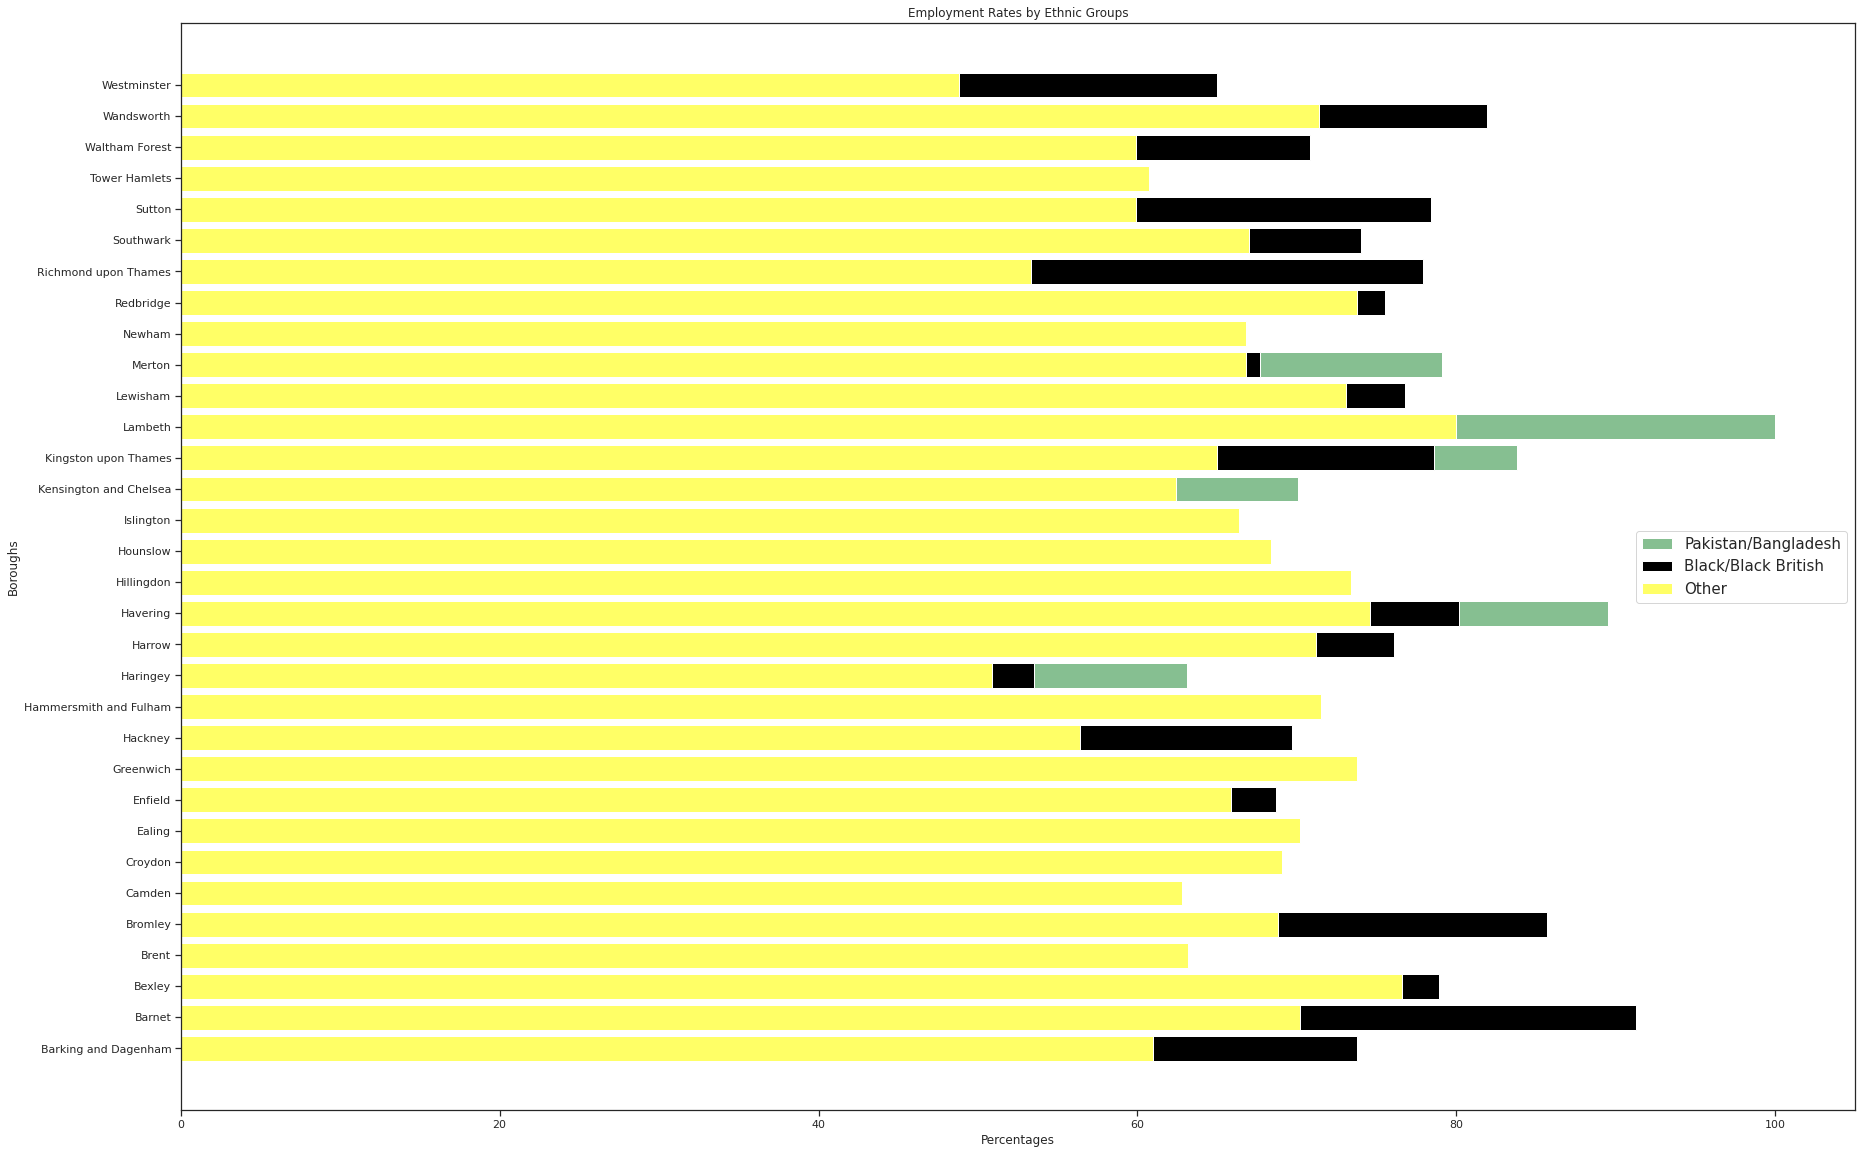

In [22]:
#Using a horizontal bar chat
#Ploting the employment rate of Pakistan/Bangladesh
plt.barh(employmentrate.Area, employmentrate['Pakistan/Bangladesh'], label='Pakistan/Bangladesh', color='#86bf91')

#Ploting the employment rate of Black/Black British
plt.barh(employmentrate.Area, employmentrate['Black/Black British'], label='Black/Black British', color='#000000')
        
#Ploting the employment rate of Other ethnic groups
plt.barh(employmentrate.Area, employmentrate.Other, label='Other', color='#FFFF66')

#Adding legends and labels
plt.legend(loc='center right', prop={'size': 15})
plt.title('Employment Rates by Ethnic Groups')
plt.xlabel('Percentages')
plt.ylabel('Boroughs')
plt.rcParams['figure.figsize'] = (30,20)

#Displaying the plot
plt.show()

Above, are the final 3 ethnic groups. For Black/Black British, Barnet is the borough with the highest employment rate with only Bromley trailing behind. Pakistan/Bangladesh has the highest employment rate in Lambeth, but I mentioned earlier, that part of the data is misleading because there was't any record for number of employed  Pakistan/Bangladesh divided by their total population. I selected the second largest percetage of employment rate for the Pakistan/Bangladesh and used it to conclude on where they have their highest employment rate. That borough is, Havering. Other ethnic groups have the highest employment rate in Lambeth with Bexley trailing behind.

**Employment Industries**

My aim is to discover the boroughs that have the highest employment industry across the boroughs in london. What is the industry that has the higest employment and what borough is it located in? Just like I did for the employment rate dataset, I will split the employment industries graphs into two for better analysis.

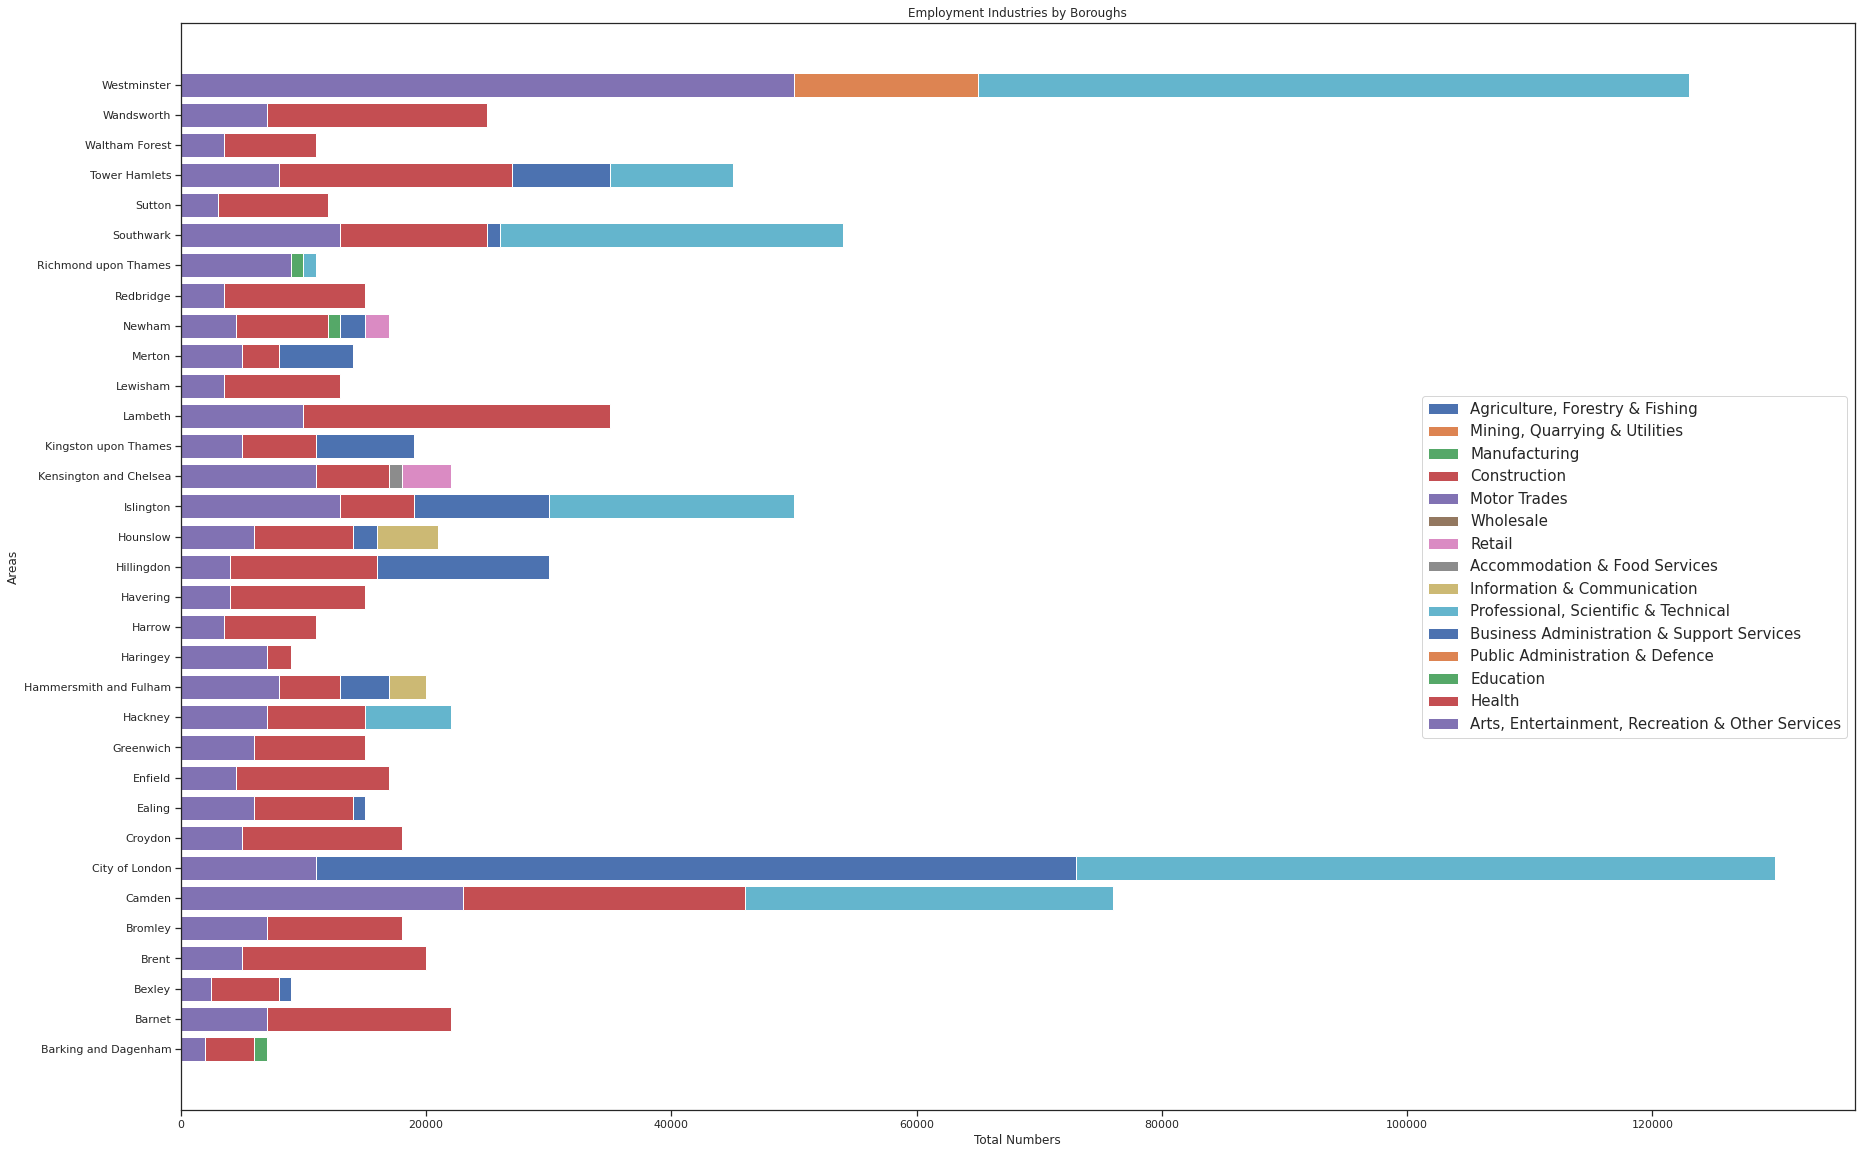

In [23]:
#Ploting half of the employment industry
plt.barh(employmentindustry.Area, employmentindustry['Agriculture, Forestry & Fishing'], 
         label='Agriculture, Forestry & Fishing')

plt.barh(employmentindustry.Area, employmentindustry['Mining, Quarrying & Utilities'], 
         label='Mining, Quarrying & Utilities')

plt.barh(employmentindustry.Area, employmentindustry['Manufacturing'], 
         label='Manufacturing')

plt.barh(employmentindustry.Area, employmentindustry['Construction'], 
         label='Construction')

plt.barh(employmentindustry.Area, employmentindustry['Motor Trades'], 
         label='Motor Trades')

plt.barh(employmentindustry.Area, employmentindustry['Wholesale'], 
         label='Wholesale')

plt.barh(employmentindustry.Area, employmentindustry['Retail'], 
         label='Retail')

plt.barh(employmentindustry.Area, employmentindustry['Accommodation & Food Services'], 
         label='Accommodation & Food Services')

plt.barh(employmentindustry.Area, employmentindustry['Information & Communication'], 
         label='Information & Communication')

plt.barh(employmentindustry.Area, employmentindustry['Professional, Scientific & Technical'], 
         label='Professional, Scientific & Technical')

plt.barh(employmentindustry.Area, employmentindustry['Business Administration & Support Services'], 
         label='Business Administration & Support Services')

plt.barh(employmentindustry.Area, employmentindustry['Public Administration & Defence'], 
         label='Public Administration & Defence')

plt.barh(employmentindustry.Area, employmentindustry['Education'], 
         label='Education')

plt.barh(employmentindustry.Area, employmentindustry['Health'], 
         label='Health')

plt.barh(employmentindustry.Area, employmentindustry['Arts, Entertainment, Recreation & Other Services'], 
         label='Arts, Entertainment, Recreation & Other Services')

#Adding legend and titles
plt.legend(loc='center right', prop={'size': 15})
plt.title('Employment Industries by Boroughs')
plt.xlabel('Total Numbers')
plt.ylabel('Areas')
plt.rcParams['figure.figsize'] = (20,20)

# Display the plot
plt.show()

In this employment industries chart of london boroughs, in the City of London and Westminister the Professional, Scientific & Technical industry according to the bar chart is the highest job sector. That is very interesting, what could be the population by ethinic group or health condition for example in Westminister & City of London. In second place, also in the city of London, Business Administration, is second highest employment industry. Also in Westminister, the third highest employment industry is Mining, Quaring & Utilities. There is a trend here, the City of London & Westminister have a high rate of a variety of different employment industries, therefore this indicates that there would be more job oppotunities in those boroughs. 
Compared to my findings above, Black/Black British have a high employment rate in Barnet, and looking at this employment industry chart, its safe to assume that Black/Black British are employed in the Health sector. In addition, the goegraphical graphs I ploted above on london census, you discover that there is a high female population in Barnet.

**Correlation Analysis**

I will perform correlation analysis to quantify and amount of linear correspondance between two variables. The two variables are going to be population by bad health and population by christian religion. Those two variables were chosen because when I graphed them geographically earlier on in the notebook, they had a wide spread across all the boroughs in london. I will first perform a Pearson's correlation, then Spearman, plot a scatter graph to find any differences or relationships, I will also use the function corr() to produce a data frame of all the correlation coefficients for each pair of numeric variables. The corr() function is basically a matrix with variables as columns and then it also produces rows that will be very useful to plot a heatmap in the Seaborne library. I will use the Seaborn heatmap hue as a visual indication of positive or negative correlation.

In [24]:
#Selecting the two variables
val1 = ldncensusdf['Population by religion: Christian']
val2 = ldncensusdf['Population by health condition: Bad health']

**Pearson's correlation**

In [25]:
corrPearson, pValPearson = stats.pearsonr(val1,val2)
print ("Pearson's correlation is", corrPearson, "with a p-value of",pValPearson)

Pearson's correlation is 0.22488288314970362 with a p-value of 1.3531800616248358e-08


**Spearman's correlation**

In [26]:
corrSpearman, pValSpearman = stats.spearmanr(val1,val2)
print ("Spearman's correlation is", corrSpearman, "with a p-value of",pValSpearman)

Spearman's correlation is 0.23575395032872473 with a p-value of 2.4984869809192027e-09


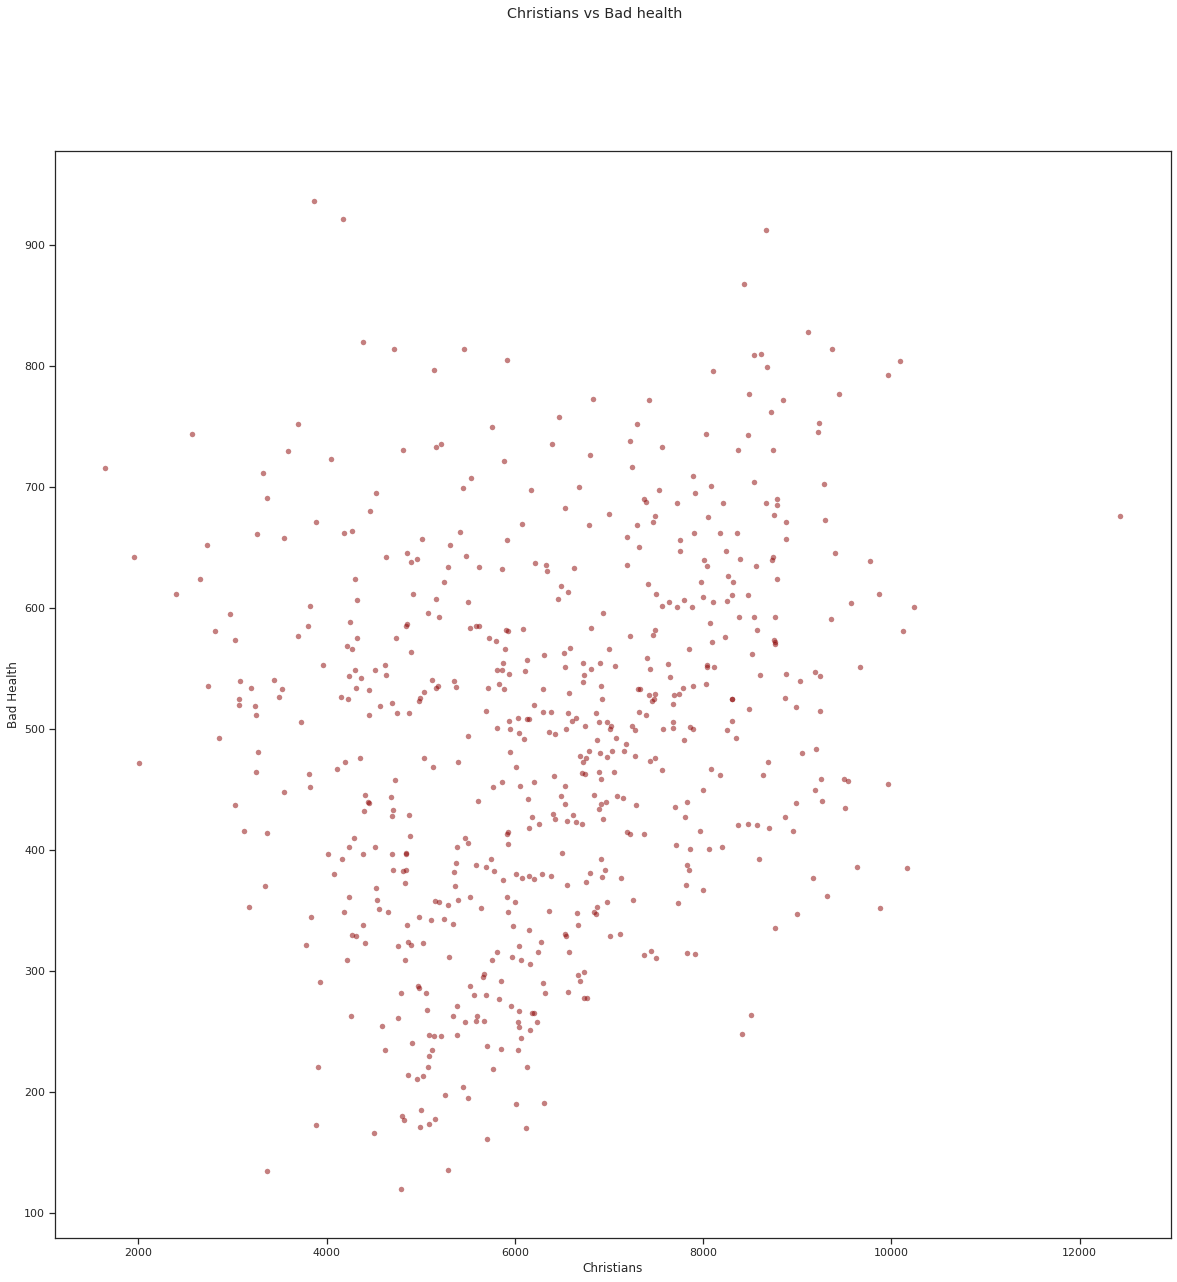

In [27]:
plt.suptitle('Christians vs Bad health')
plt.xlabel('Christians')
plt.ylabel('Bad Health')
plt.scatter(val1,val2 , c = "#8b0000", s = 30, alpha = 0.5, linewidth='0')

Just like my Pearsons and Spearmans correlation calculated, in the scatter plot above, there doesn't seem to be any linear relationship at all because since my calculated correlation values are between 0 & 0.3, it indicates a weak positive(negative) linear relationship. Despite that, if you keep having a look at the scatter plot over and over again it may look like a regression line could be drawn across.

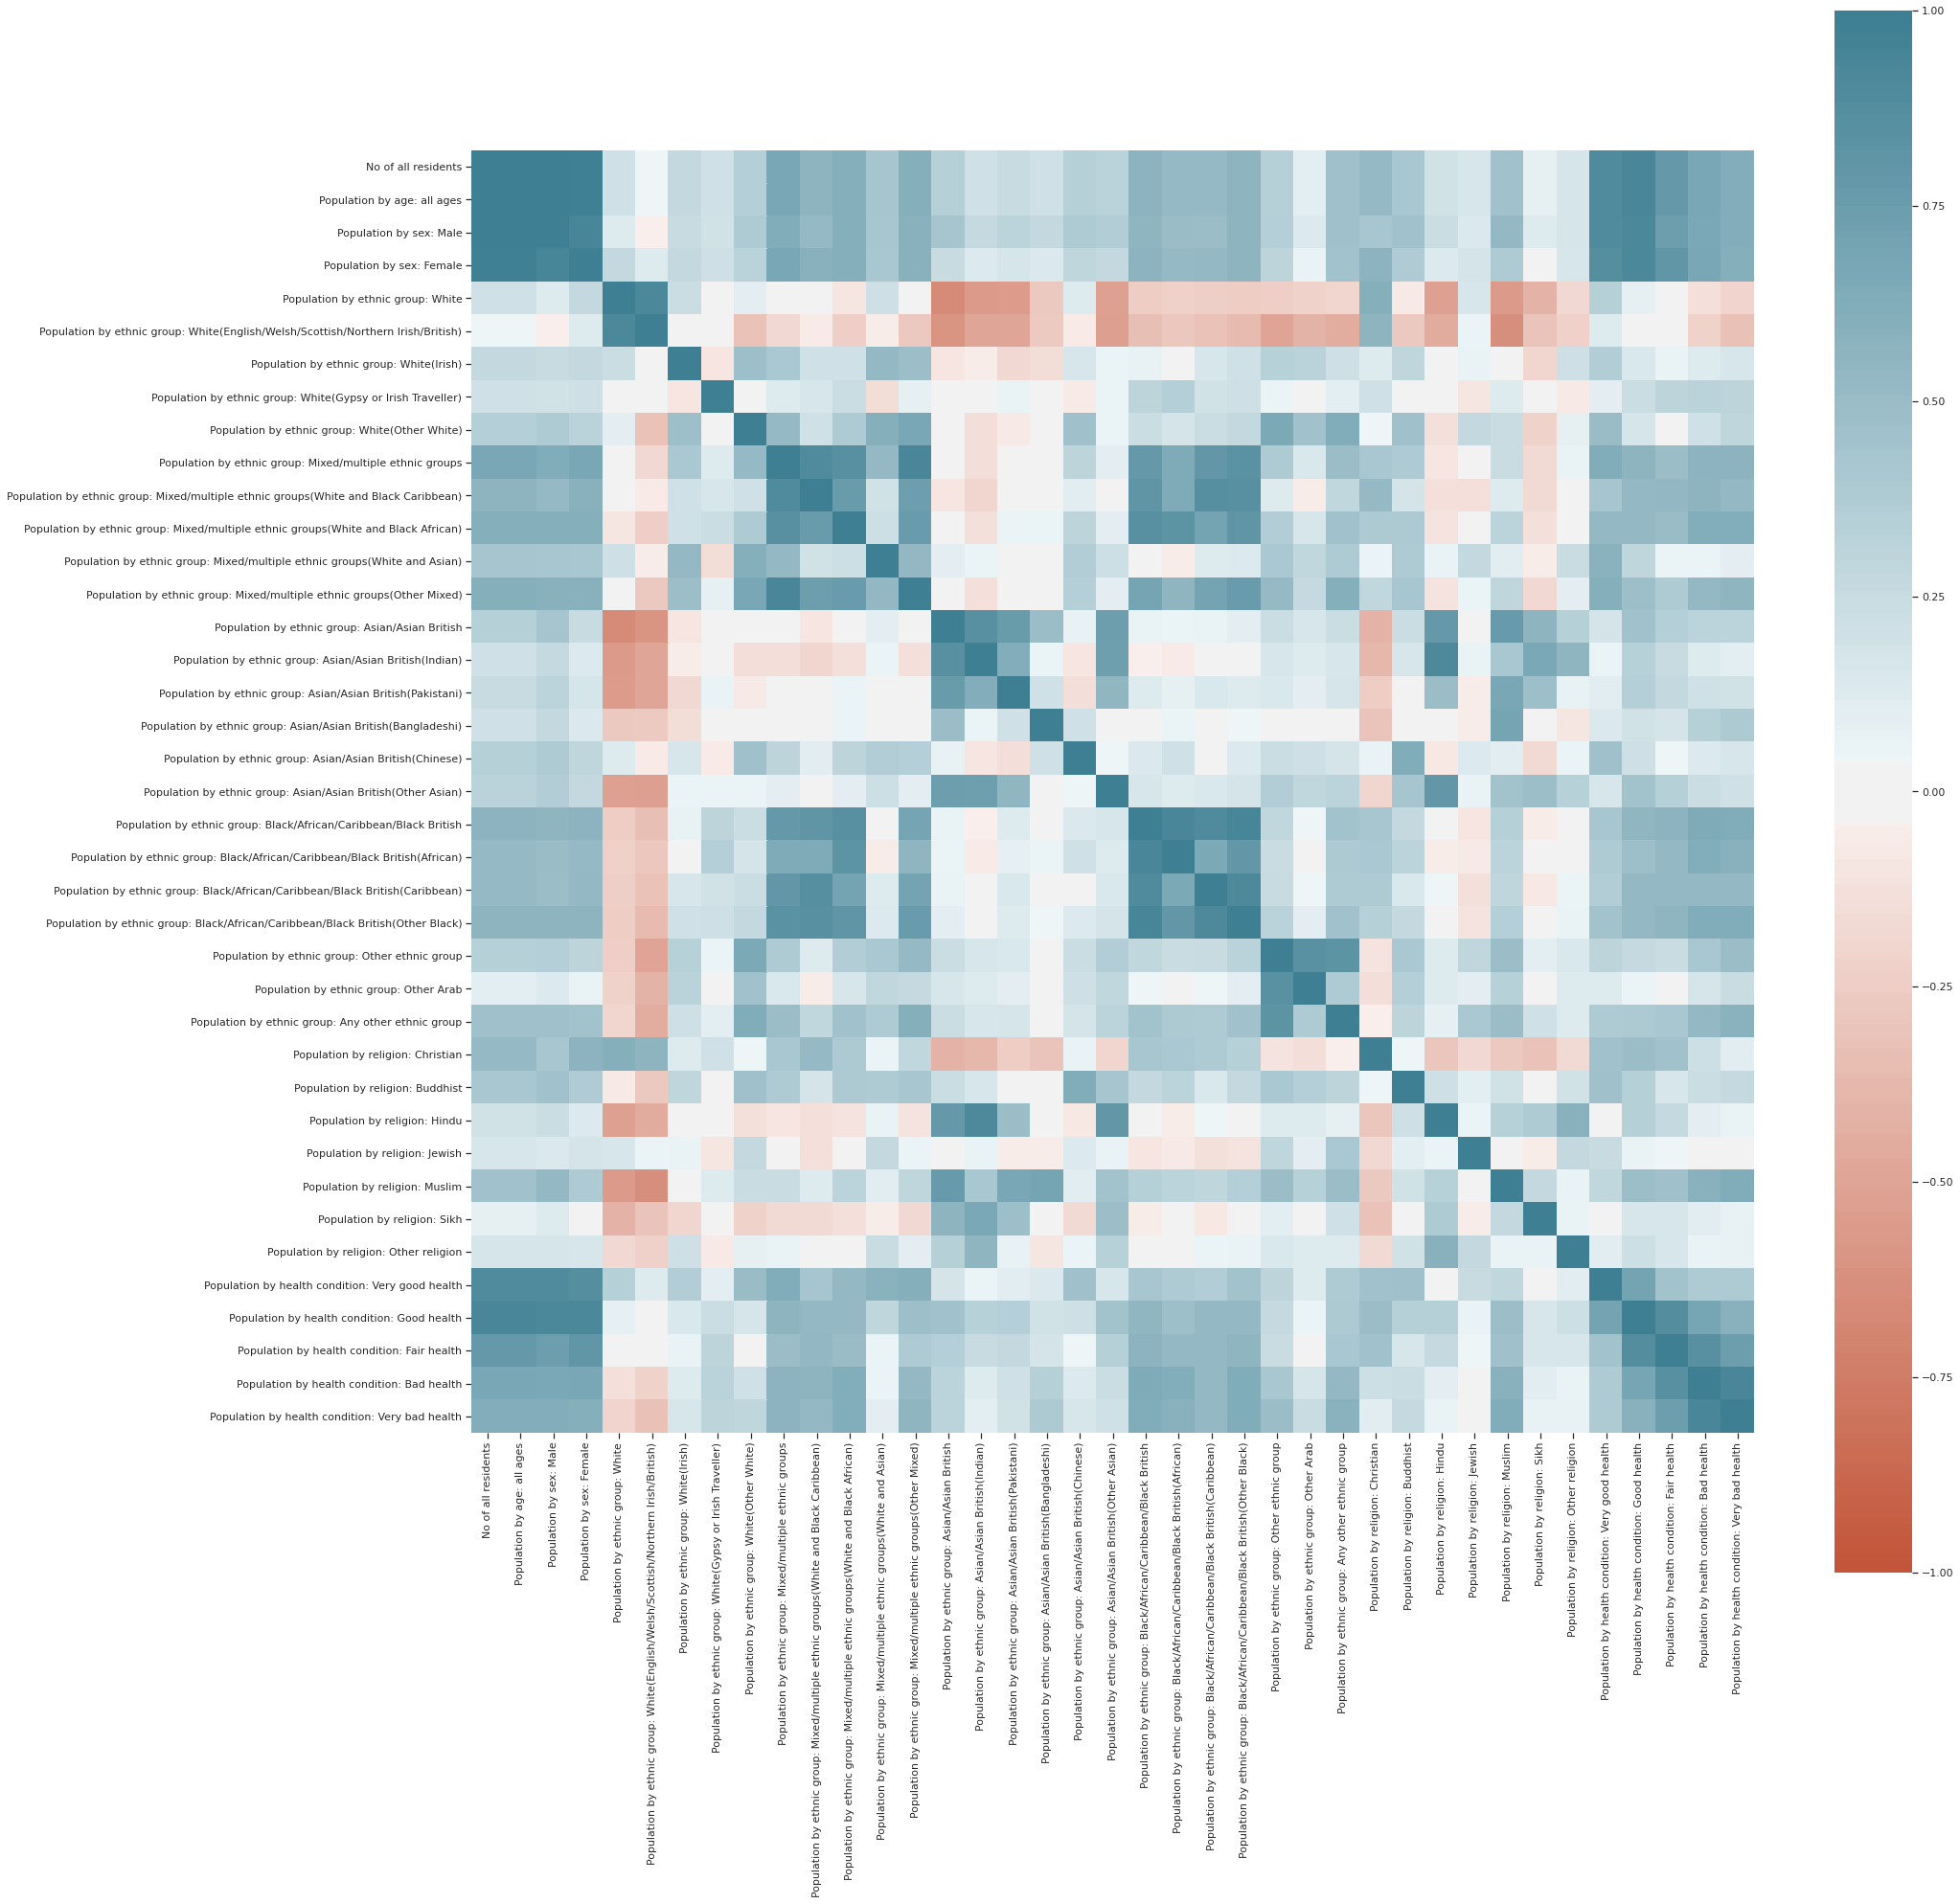

In [28]:
corr = ldncensusdf.corr()
#print(corr.head())

plt.figure(figsize = (30,30))
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

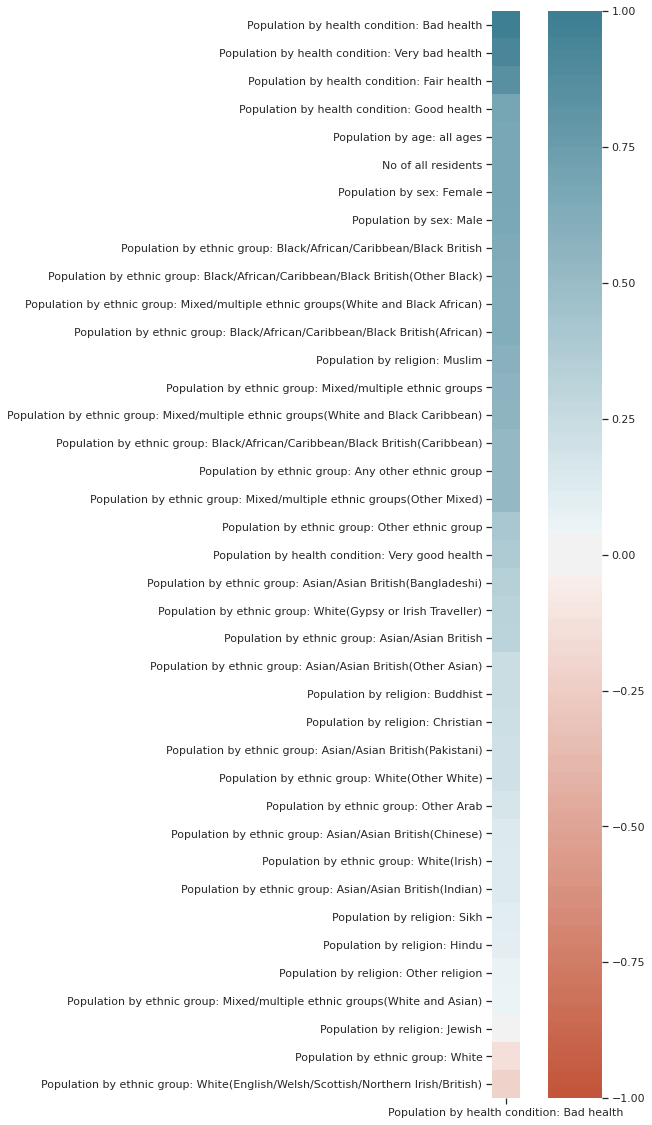

In [29]:
#Correlation with sole focus on population with bad health
corrbadhealth=corr[['Population by health condition: Bad health']]

#Sorting the amount of correlation
corrbadhealth=corrbadhealth.sort_values(by ='Population by health condition: Bad health',ascending=False)

plt.figure(figsize = (10,20))
import seaborn as sns
ax = sns.heatmap(
    corrbadhealth, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

The correlation above shows the variables that are highly correlated with Bad health. It is very helpful because I can chose those variables to build a model that will be a very good predictor. Now, the next step is to look for variables that have the strongest correlations with Bad health. I will first restructure the correlation matrix in a way that for each row, I will have variables and their correlation listed and then I will sort all the correlations in the right order.

In [30]:
#Make a copy
corrcopy=corr.copy()

#Creating a new column for the variable name & index
corrcopy.index.name = 'var1'
corrcopy.reset_index(inplace=True)

#Preserving the column
corrpair = corrcopy.melt(id_vars = ['var1'])

#Replacing the some of the column names
corrpair = corrpair.rename(columns = {'variable': 'var2','value': 'corr'})

#Removing duplicate rows where var1 and var2 are the same
corrpair = corrpair.drop(corrpair[corrpair['var1']==corrpair['var2']].index)

The next step is to view the distribution of the residuals, locate the top ten most positive & negative correlations and then finally find the variables that correlate with the population of Bath health variable.


Top ten most positively correlated pairs of variables
                            var1                         var2      corr
1    Population by age: all ages          No of all residents  1.000000
39           No of all residents  Population by age: all ages  1.000000
41       Population by sex: Male  Population by age: all ages  0.984770
2        Population by sex: Male          No of all residents  0.984770
78           No of all residents      Population by sex: Male  0.984770
79   Population by age: all ages      Population by sex: Male  0.984770
3      Population by sex: Female          No of all residents  0.983954
117          No of all residents    Population by sex: Female  0.983954
42     Population by sex: Female  Population by age: all ages  0.983954
118  Population by age: all ages    Population by sex: Female  0.983954

Top ten most negatively correlated pairs of variables (reverse order)
                                                   var1  \
1213                  P

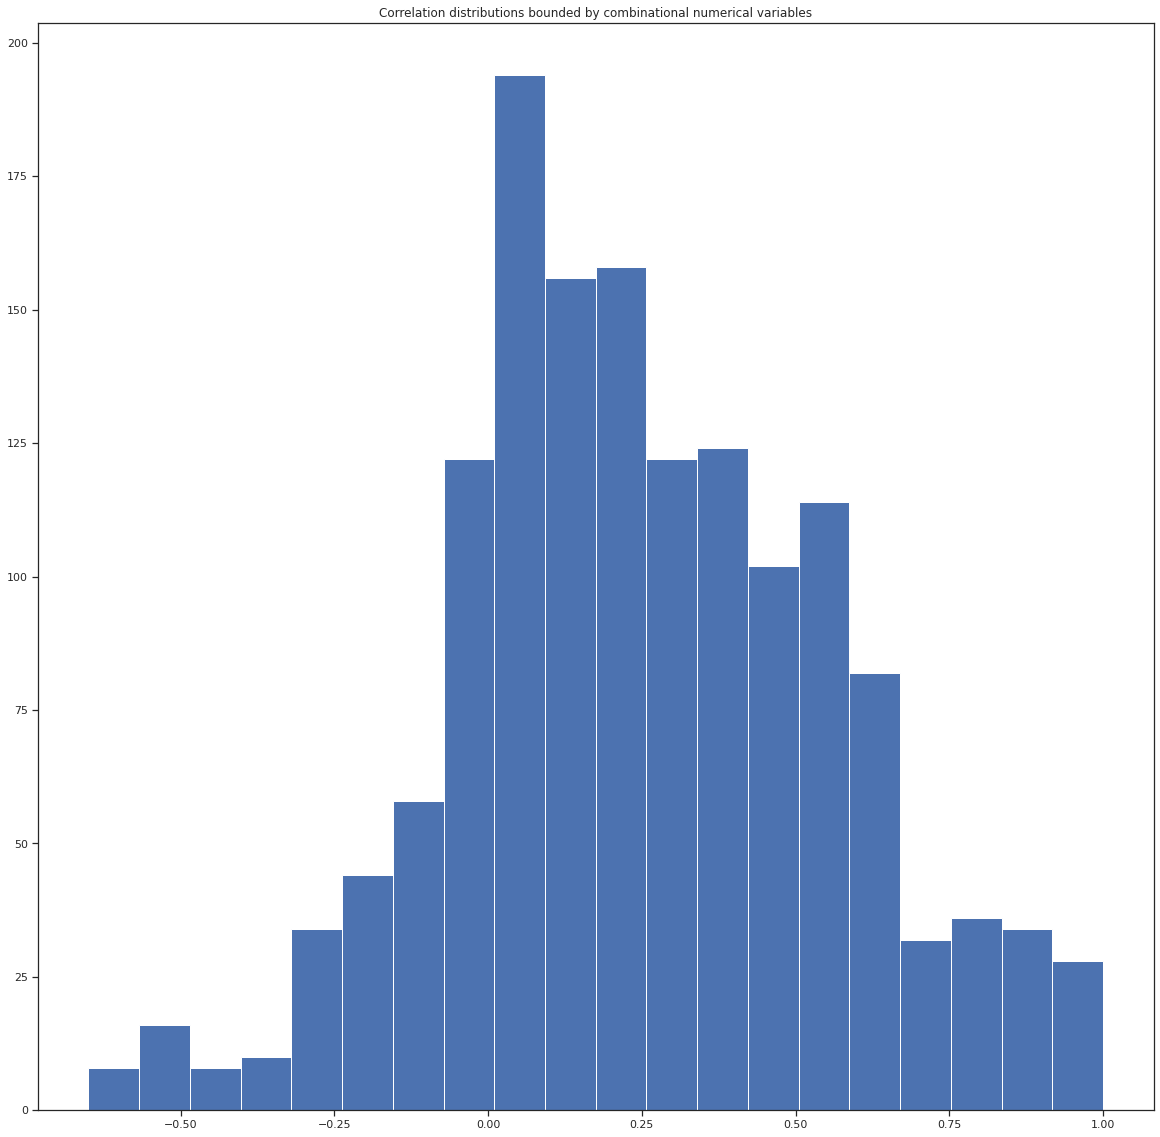

In [31]:
#Ploting the histogram
plt.hist(corrpair['corr'],20)
plt.title("Correlation distributions bounded by combinational numerical variables")

#Sorting the correlation rows
corrpair = corrpair.sort_values(by ='corr',ascending=False)

print()
print("Top ten most positively correlated pairs of variables")
print(corrpair.head(10))

print()
print("Top ten most negatively correlated pairs of variables (reverse order)")
print(corrpair.tail(10))

#Adding extra column with absolute correlation
corrpair['abscorr']=abs(corrpair['corr'])
#Sorting in ascending order
corrpair=corrpair.sort_values(by ='abscorr',ascending=False)

print()
print("Top ten most correlated pairs of variables with 'Population by health condition: Bad health'")
print(corrpair[corrpair['var1']=='Population by health condition: Bad health'].head(10))

**Regression analysis**

In order to model the relationship between the population spread of bad health in london and the christian population, I would need to build a couple of regression models. My dependent variable is going to be "Population by health condition: Bad health" and independent variable is going to be "Population by religion: Christian". There are other independent variable I could use like "Population by health condition: Very bad health" for example which is has the best correlation but if you look at the dataset, the figures recorded in both columns are almost the same. Also it wouldn't be wise to find a relationship between Bad health and Very bad health because they're variables that are very similar in description and numbers which I previously just mentioned. 

In [32]:
#Building linear regression model
#There are 4 values that linear regression function returns that describes the model
slope, intercept, rvalue, pvalue, stderr = stats.linregress(val1, val2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", pvalue)
print ("std_err: ", stderr)

Slope:  0.020114470272568432
Intercept:  361.55049884822114
p_value:  1.3531800616246602e-08
std_err:  0.0034945234030474056


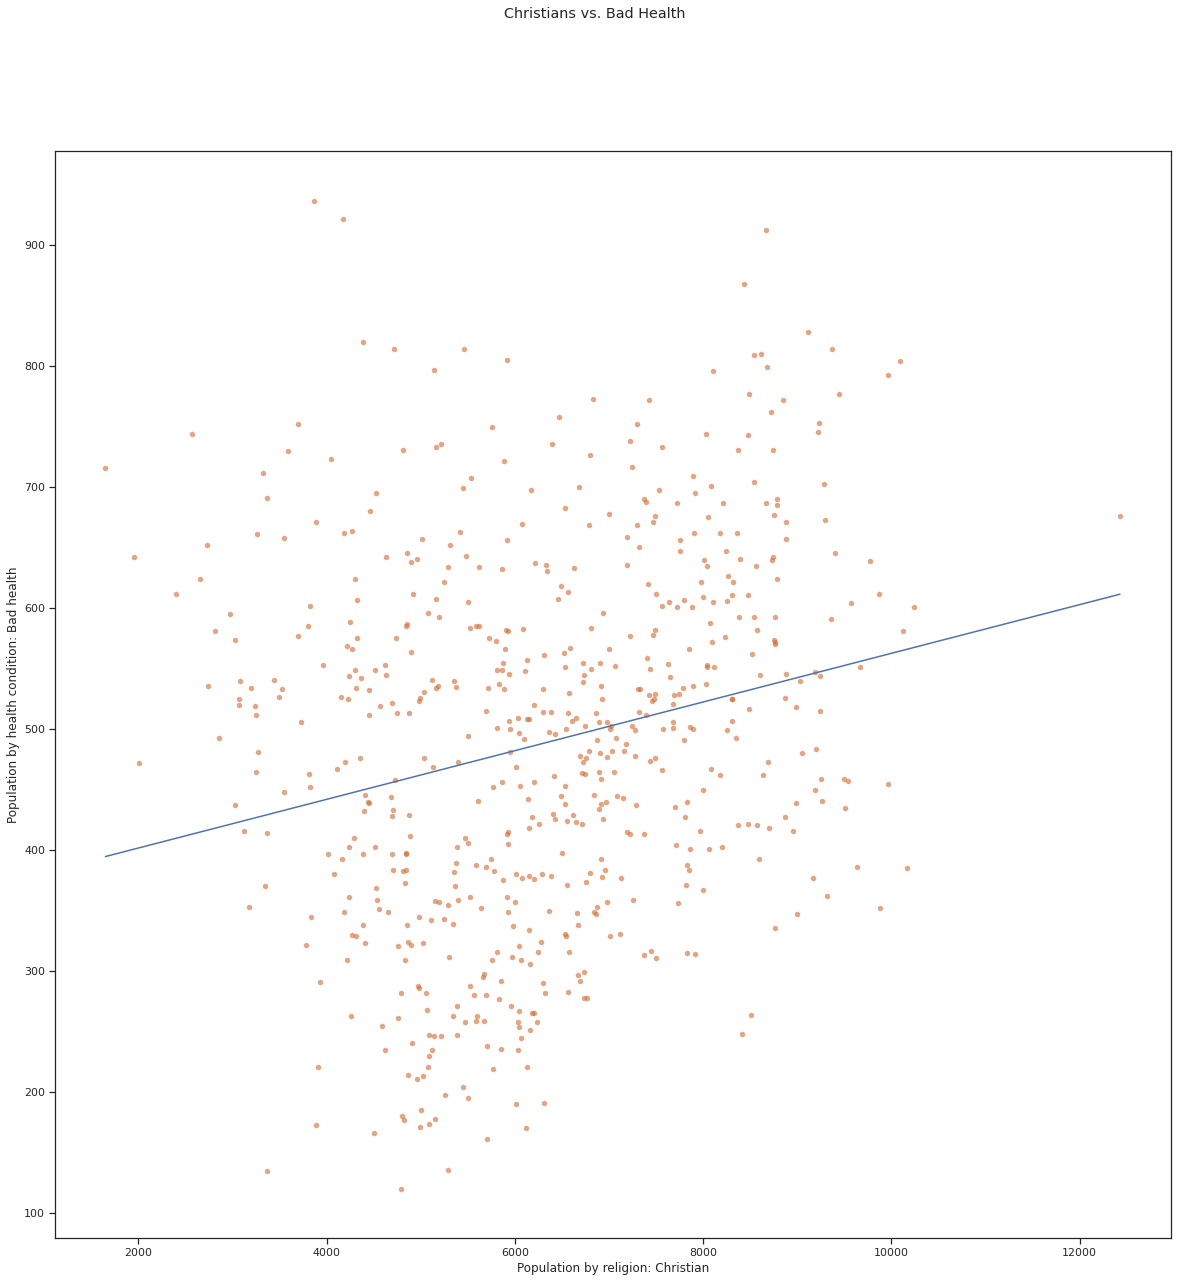

In [33]:
#Calculating regression line
#Calculating 2 points from the parameters
x1=val1.min() #min value of the independent variable
x2=val1.max() #max value of the independent variable
y1=x1*slope + intercept #calculate the dependent variable value from x1
y2=x2*slope + intercept #calculate the dependent variable value from x2

#Ploting scatterplot
plt.suptitle('Christians vs. Bad Health')
plt.xlabel('Population by religion: Christian')
plt.ylabel('Population by health condition: Bad health')
plt.scatter(val1, val2, c = "#D06B36", s = 30, alpha = 0.6, linewidth='0')

plt.plot([x1,x2],[y1,y2])

Looking at the scatterplot, it is obvious that the scatterplot does not seem to fit well due to the fact that there isn't a relationship. I will try fitting a polynomial curve(second order curve) using a numpy function called np.polyval().

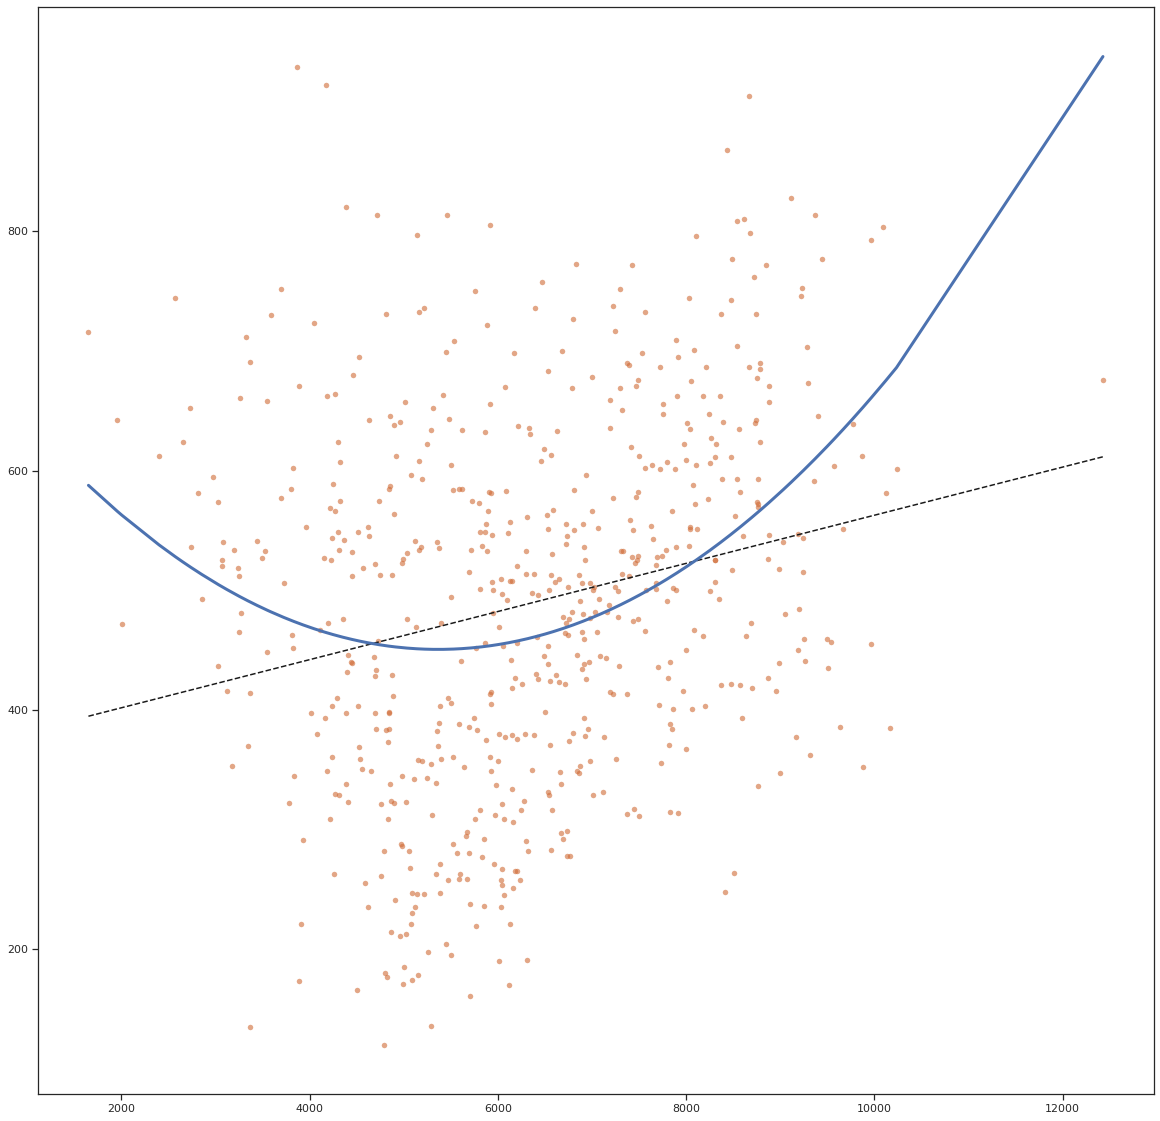

In [34]:
#Fiting second-order curve
pCoeff = np.polyfit(val1, val2, 2)
#Sorting the curve to make it look like a curve is supposed to be
xs = np.sort(val1)
#Calculating the value for each use of the polynomial
ys = np.polyval(pCoeff, xs)

#Ploting data values
plt.scatter(val1,val2 , c = "#D06B36", s = 30, alpha = 0.6, linewidth='0')
#Ploting linear "curve" so that it looks dashed
plt.plot([x1,x2],[y1,y2], "k--")
#Ploting second order polynomal curve
plt.plot(xs, ys, linewidth = 3, fillstyle="none")

**Multiple Regression**

In order to carry out a multiple regression I will use the statsmodels library. Following that, I will also calculate, manually, some of the measures. I cannot use my highest correlated variable from above, first of all the recorded data is almost the same which is why it has a 98% correlation with Bad Health. Because my top three highest correlated variable are all within the same topic, health, I will use 'Population by sex: Male' for the multiple regression calculation.

In [35]:
#Using the dependent variable 'Population by health condition: Bad health' here is  is still
dependent = val2;
#The two independent variables(regressors) 
independents = ldncensusdf[["Population by religion: Christian", "Population by sex: Male"]]
#Adding the intercepts
indeptswithconst = sm.add_constant(independents)

# we use the OLS function from statsmodels
model = sm.OLS(dependent, indeptswithconst)
results = model.fit()

print (results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Population by health condition: Bad health   R-squared:                       0.438
Model:                                                    OLS   Adj. R-squared:                  0.436
Method:                                         Least Squares   F-statistic:                     242.3
Date:                                        Thu, 21 Jan 2021   Prob (F-statistic):           1.69e-78
Time:                                                21:44:19   Log-Likelihood:                -3844.6
No. Observations:                                         624   AIC:                             7695.
Df Residuals:                                             621   BIC:                             7709.
Df Model:                                                   2                                         
Covariance Type:                                    nonrobust            

The model has a 0.438 R-Squared value indicating that the model was not a good fit at all. The R-Squared value is important because it is a measure of how good the regression line approximates the data points. Also, because the P-Value is higher than the coefficient, it signifies a non exiestent relationship. Finally population has a bigger significance on the model because like we calculated earlier, it has a high correlation with Bad health.

**Calculating Residuals**

const                               -15.955935
Population by religion: Christian    -0.006336
Population by sex: Male               0.084426
dtype: float64


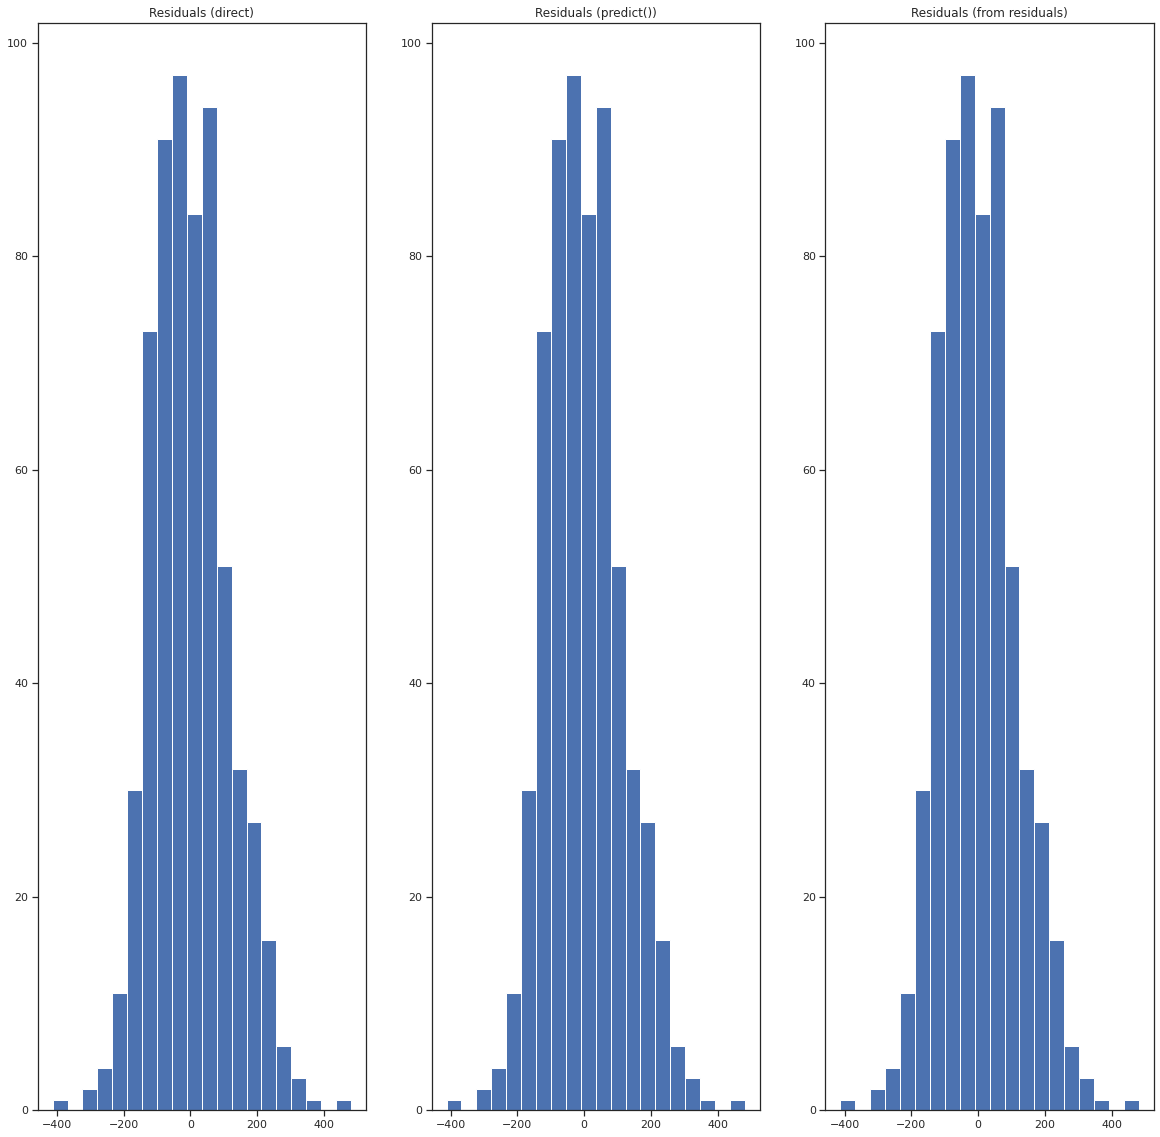

In [36]:
#Calculating dependent variable values from parameters directly
modelledDependentOLSDirect  = ldncensusdf["Population by religion: Christian"]*results.params["Population by religion: Christian"] + ldncensusdf["Population by sex: Male"]*results.params["Population by sex: Male"] + results.params['const']

#Calculating dependent variable values from the predict method
modelledDependentOLSPredict  = results.predict()

#Calculate the residuals 3 ways
residualsDirect=dependent-modelledDependentOLSDirect
residualsPredict=dependent-modelledDependentOLSDirect
residualsFromLib=results.resid


#both residual distributions are the same (because both methods of
#calculating the dependent variable values are the same)
f, ax = plt.subplots(1, 3)
ax[0].set_title("Residuals (direct)")
ax[0].hist(residualsDirect,20)
ax[1].set_title("Residuals (predict())")
ax[1].hist(residualsPredict,20)
ax[2].set_title("Residuals (from residuals)")
ax[2].hist(residualsFromLib,20)

print(results.params)

Since the residuals look fairly big, I think its safe to say that the model is averagely good.

153.16078342980958


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc62f89e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc62a2b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc6292b850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc62a2bb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc68384150>],
 'means': []}

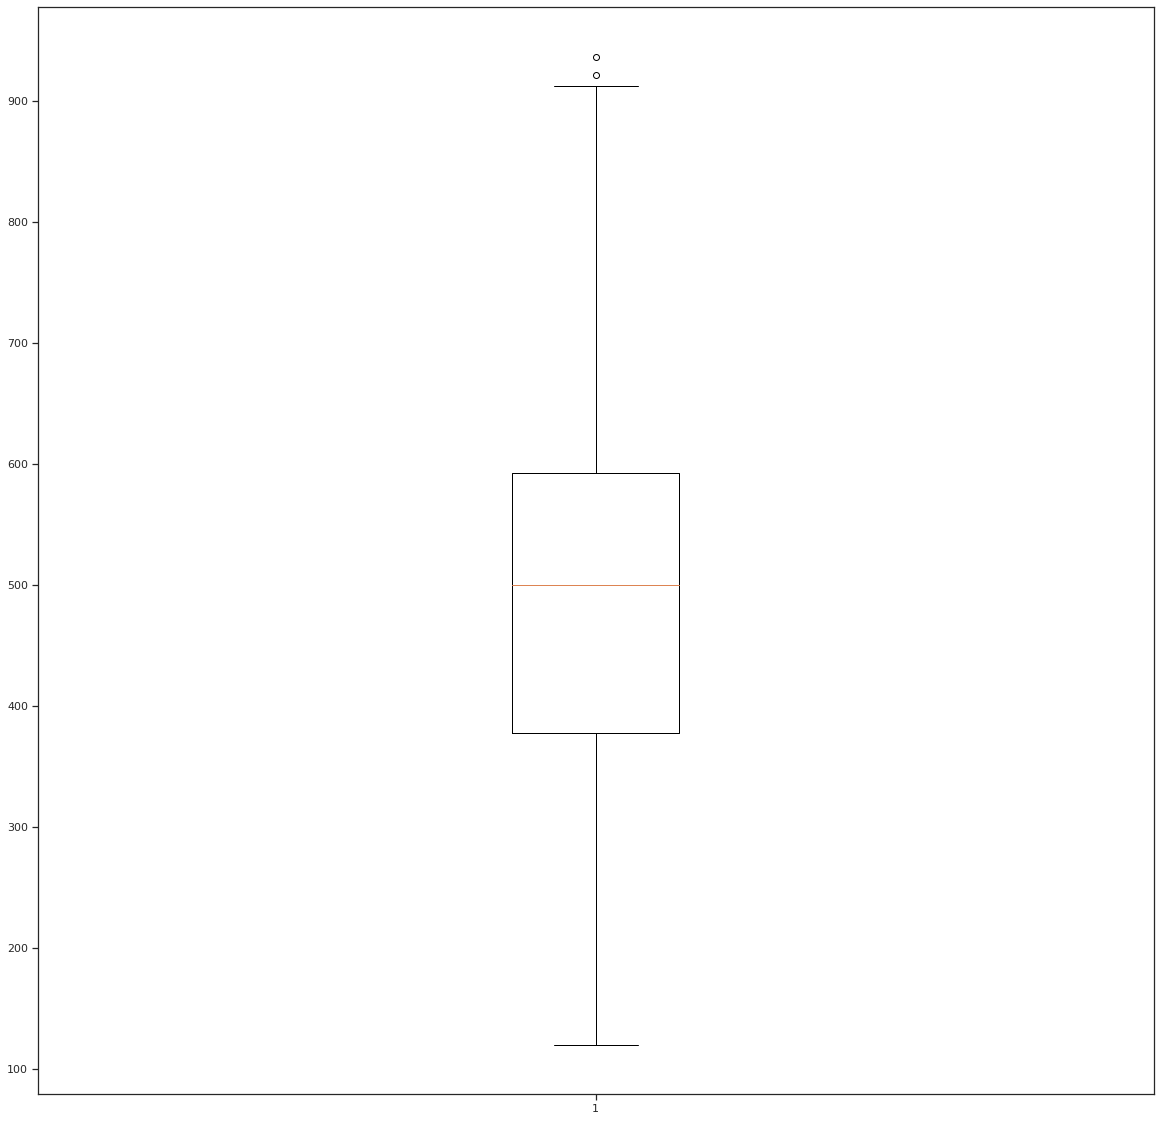

In [37]:
#Checking standard deviation for more clarity
print(dependent.std())
plt.boxplot(dependent)

With a standard deviation of 500, it is fair to say that the residuals indicated a more than average amount of the variation in the data. From the geographical maps I plotted earlier, you could see how widely spread both variables that I used are.

In [38]:
print("R-squared:",results.rsquared)
print("MSE model:",results.mse_model)
print("MSE residuals:",results.mse_resid)
print("MSE total:",results.mse_total)

R-squared: 0.43827511491289295
MSE model: 3202580.2535167076
MSE residuals: 13219.507294405086
MSE total: 23458.225580833023


In conclusion a R squared score of 0.438, doesn't entirely mean the model is bad because you can gather information from the predictors. I will conclude and finalize by agreeing that my R square score is a fairly good or you could say, reasonable model. Thank you and I hope you find my analysis helpful!